 Test the generation of some frequency related features on some DAS data

In [23]:
from scipy import signal
import pandas as pd
import obspy as op
import glob
import matplotlib.pylab as plt
%matplotlib inline

In [7]:
infilename = "channel_85_clipped_1hr_test.mseed"

In [16]:
test_stream = op.read(infilename,format='mseed')

In [17]:
datastream = test_stream[0].data
freq = test_stream[0].stats.sampling_rate

In [18]:
f, Pxx = signal.welch(datastream,fs=freq,window='hanning')

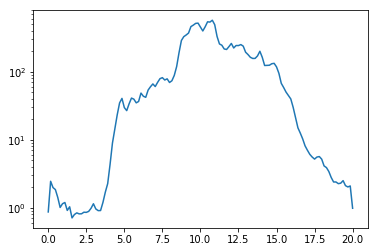

In [19]:
plt.semilogy(f,Pxx)

This is interesting - has quite a different shape to tyical seismogram data - a definite peak though

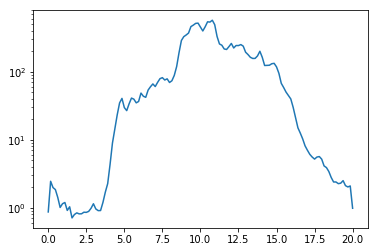

In [21]:
fig = plt.figure()
plt.semilogy(f,Pxx)

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


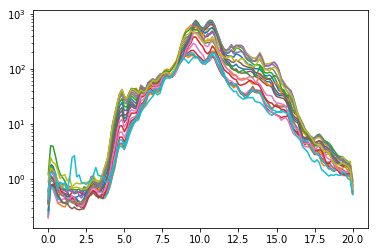

In [27]:
seed_files = glob.glob("channel*test.mseed")
for infile in seed_files:
    
    f = op.read(infile,format='mseed')
    
    datastream = f[0].data
    freq = f[0].stats.sampling_rate
    f, Pxx = signal.welch(datastream,fs=freq,window='hanning')
    plt.semilogy(f,Pxx)
    plt.hold('on')

All of these peridograms look similar. Lets see if thats the case for another point in the timseries

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


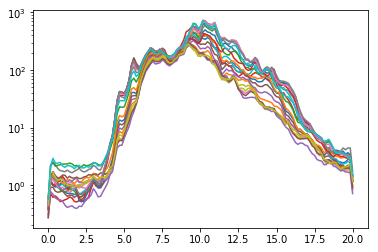

In [28]:
plt.figure()
seed_files = glob.glob("channel*test2.mseed")
for infile in seed_files:
    
    f = op.read(infile,format='mseed')
    
    datastream = f[0].data
    freq = f[0].stats.sampling_rate
    f, Pxx = signal.welch(datastream,fs=freq,window='hanning')
    plt.semilogy(f,Pxx)
    plt.hold('on')

it is quite different - but need to see if this is a consistent featture

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


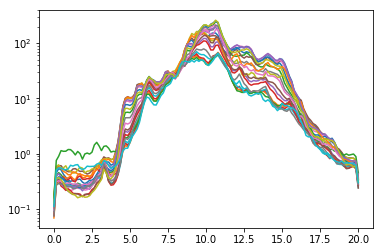

In [31]:
plt.figure()
seed_files = glob.glob("channel*before_peak.mseed")
for infile in seed_files:
    
    f = op.read(infile,format='mseed')
    
    datastream = f[0].data
    freq = f[0].stats.sampling_rate
    f, Pxx = signal.welch(datastream,fs=freq,window='hanning')
    plt.semilogy(f,Pxx)
    plt.hold('on')

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


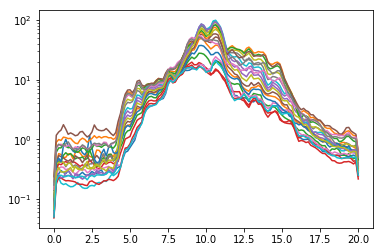

In [32]:
plt.figure()
seed_files = glob.glob("channel*after_peak.mseed")
for infile in seed_files:
    
    f = op.read(infile,format='mseed')
    
    datastream = f[0].data
    freq = f[0].stats.sampling_rate
    f, Pxx = signal.welch(datastream,fs=freq,window='hanning')
    plt.semilogy(f,Pxx)
    plt.hold('on')

To be honest they look quite similar across multiple runs of this, but we will include this in the feature calculation all the same

In [34]:
import numpy as np
f[np.argmax(Pxx)]

10.625

In [ ]:
plt.figure()
seed_files = glob.glob("channel*after_peak.mseed")
for infile in seed_files:
    
    f = op.read(infile,format='mseed')
    
    datastream = f[0].data
    freq = f[0].stats.sampling_rate
    f, Pxx = signal.welch(datastream,fs=freq,window='hanning')
    plt.semilogy(f,Pxx)
    plt.hold('on')

In [35]:
import pywt

In [ ]:
## Not really sure what this is or whether its useful 

In [36]:
A1_x, D1_x, D2_x, D3_x, D4_x, D5_x, D6_x = pywt.wavedec(datastream, 'db1', level=6)

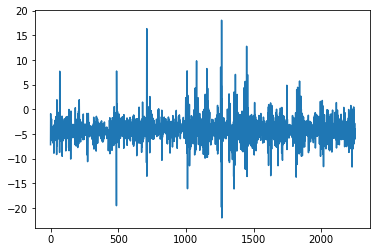

In [43]:
plt.plot(A1_x)

In [63]:
coefs, freqs = pywt.cwt(datastream,np.arange(1,200),wavelet='morl')

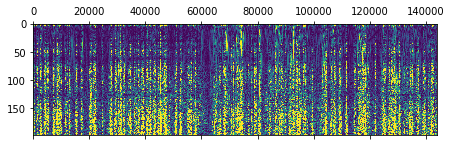

In [64]:
plt.matshow(abs(coefs),aspect=200,vmax=10)